In [1]:
import gal_class
import numpy as np

In [2]:
#Example
rbin = np.arange(0,40,1)
c = 5.
m = 1.
gal = gal_class.Galaxy(m, c, data_vel=1, data_err=1, data_r=rbin)
mass_nfw = gal.mass_nfw()


Text(0, 0.5, '$M_{NFW}$')

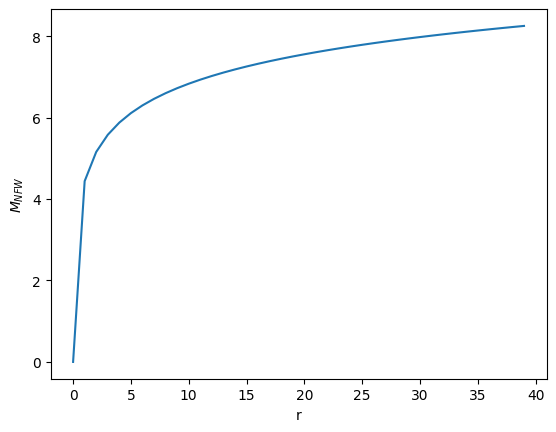

In [3]:
import matplotlib.pyplot as plt
plt.plot(rbin, mass_nfw)
plt.xlabel('r')
plt.ylabel('$M_{NFW}$')

In [4]:
import numpy as np
from numpy import pi, log


#some constants
h = 0.678 #Gaia 2016

G = 6.67430e-11

Msun = 1.98847e30
kpc = 3.0856775814913673e19

fac = 102

rhocrit = 3*(100*h/(kpc))**2/(8*np.pi*G) * kpc**3 / Msun

def delc(c):
    return (fac/3)*c**3/(log(1+c)-c/(1+c))
    

def mass_nfw(r, mvir, cvir):
    
    rv = (mvir/((4/3) * pi * fac * rhocrit))**(1/3)
    
    rs = rv / cvir
    
    rhos = rhocrit*delc(cvir)
    
    return 4 * pi *  rhos * rs**3 * (log((r + rs) / rs) + rs/(r + rs) - 1) 

def velocity(x, mass, c):
    return np.sqrt(G * Msun * mass_nfw(x, mass, c) / x/kpc) / 1e3
    
data_r = np.linspace(1e-1, 10, 20)
vcen = velocity(data_r, 5e10, 15)
verr = (velocity(data_r, 5e10*1.1, 15*1.1) - velocity(data_r, 5e10*0.9, 15*0.9))/2

In [5]:
verr

array([1.07665904, 2.45989833, 3.07902523, 3.44951144, 3.68860436,
       3.84739425, 3.95331819, 4.02281252, 4.06641663, 4.09121248,
       4.10212524, 4.10267187, 4.09541698, 4.08226289, 4.06464062,
       4.04363934, 4.02009621, 3.99465997, 3.9678368 , 3.94002385])

In [6]:
vcen

array([11.69705578, 27.69937333, 35.81234559, 41.32202472, 45.39502076,
       48.53983303, 51.03422266, 53.04926312, 54.69855028, 56.06152499,
       57.19589563, 58.14482651, 58.94136287, 59.61128872, 60.17504459,
       60.64905537, 61.04667398, 61.37886703, 61.65472256, 61.88183228])

In [7]:
test_obj = gal_class.Galaxy(5e10, 15, vcen, verr, data_r)

test_sampler = test_obj.run_sampler()

iter: 3 | batch: 0 | bound: 0 | nc: 1 | ncall: 3 | eff(%):  0.596 | loglstar:   -inf < -1878.685 <    inf | logz: -1883.993 +/-  0.103 | dlogz: 120.532 >  0.010                                      

iter: 16002 | batch: 6 | bound: 5 | nc: 1 | ncall: 44581 | eff(%): 35.709 | loglstar: -1760.632 < -1754.825 < -1756.118 | logz: -1765.162 +/-  0.084 | stop:  0.896                                   